## Setup

In [31]:
import numpy as np
import os
import PIL
from PIL import Image
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pathlib

In [32]:
print(tf.__version__)

2.8.0


In [33]:
train_dir = 'data/Train/'
test_dir = 'data/Test/'
train_dir = pathlib.Path(train_dir)
test_dir = pathlib.Path(test_dir)

# Load and preprocess images

There are 382 total images in train directory and 120 in test directory:

In [34]:
image_count = len(list(train_dir.glob('*/*.jpg')))
print(image_count)

image_count = len(list(test_dir.glob('*/*.jpg')))
print(image_count)

382
120


Each directory contains images of that type of disease. Here is an example of each of them:

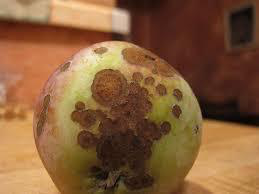

In [66]:
scab = list(train_dir.glob('Scab_Apple/*'))
PIL.Image.open(str(scab[10]))

In [ ]:
# rot = list(train_dir.glob('Rot_Apple/*'))
# PIL.Image.open(str(rot[1]))

In [ ]:
# normal = list(train_dir.glob('Normal_Apple/*'))
# PIL.Image.open(str(normal[1]))

In [ ]:
# blotch = list(train_dir.glob('Blotch_Apple/*'))
# PIL.Image.open(str(blotch[0]))

### Create a dataset

Parameters:

In [71]:
img_height = 360
img_width = 360
batch_size = 32

Train / Validation split

In [36]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  labels="inferred",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# You can print the length of each dataset as follows: from load and preprocess images tutorial notebook
print(tf.data.experimental.cardinality(train_ds).numpy())

# tf.keras.preprocessing.image_dataset_from_directory(
#     directory,
#     labels="inferred",
#     label_mode="int",
#     class_names=None,
#     color_mode="rgb",
#     batch_size=32,
#     image_size=(256, 256),
#     shuffle=True,
#     seed=None,
#     validation_split=None,
#     subset=None,
#     interpolation="bilinear",
#     follow_links=False,
#     crop_to_aspect_ratio=False,
#     **kwargs

Found 382 files belonging to 4 classes.
Using 306 files for training.
10


In [50]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# You can print the length of each dataset as follows: from load and preprocess images tutorial notebook
print(tf.data.experimental.cardinality(val_ds).numpy())

print (type(val_ds))

Found 382 files belonging to 4 classes.
Using 76 files for validation.
3
<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>


In [94]:
for images, labels in train_ds.as_numpy_iterator():
    print (image)
 

tf.Tensor(
[[[[187.70139    161.70139    134.70139   ]
   [188.         162.         135.        ]
   [189.94815    161.94815    137.94815   ]
   ...
   [190.95132    164.95132    141.95132   ]
   [189.60281    163.60281    140.60281   ]
   [189.26031    163.26031    140.26031   ]]

  [[186.61057    160.61057    133.61057   ]
   [187.10417    161.10417    134.10417   ]
   [189.08607    161.08607    137.08607   ]
   ...
   [192.7041     166.7041     143.7041    ]
   [191.20003    165.20003    142.20003   ]
   [190.96745    164.96745    141.96745   ]]

  [[186.49306    160.49306    133.49306   ]
   [187.         161.         134.        ]
   [188.91199    160.91199    136.91199   ]
   ...
   [194.73833    168.73833    145.73833   ]
   [193.64726    167.64726    144.64726   ]
   [193.34485    167.34485    144.34485   ]]

  ...

  [[197.26479    159.42317    129.50932   ]
   [186.47783    153.43896    127.1973    ]
   [165.0694     137.47688    119.25459   ]
   ...
   [  2.993232     0.863

In [96]:
for images in train_ds.take(1):
    print (image.numpy())

[[[[187.70139    161.70139    134.70139   ]
   [188.         162.         135.        ]
   [189.94815    161.94815    137.94815   ]
   ...
   [190.95132    164.95132    141.95132   ]
   [189.60281    163.60281    140.60281   ]
   [189.26031    163.26031    140.26031   ]]

  [[186.61057    160.61057    133.61057   ]
   [187.10417    161.10417    134.10417   ]
   [189.08607    161.08607    137.08607   ]
   ...
   [192.7041     166.7041     143.7041    ]
   [191.20003    165.20003    142.20003   ]
   [190.96745    164.96745    141.96745   ]]

  [[186.49306    160.49306    133.49306   ]
   [187.         161.         134.        ]
   [188.91199    160.91199    136.91199   ]
   ...
   [194.73833    168.73833    145.73833   ]
   [193.64726    167.64726    144.64726   ]
   [193.34485    167.34485    144.34485   ]]

  ...

  [[197.26479    159.42317    129.50932   ]
   [186.47783    153.43896    127.1973    ]
   [165.0694     137.47688    119.25459   ]
   ...
   [  2.993232     0.86339223   9.9

DIT IS HOE JE DE BESTANDEN AANROEPT OP NAAM IN DIRECTORY

In [73]:
list_ds = tf.data.Dataset.list_files(str(train_dir/'*/*'), shuffle=False)
list_ds = list_ds.shuffle(image_count, reshuffle_each_iteration=False)

In [77]:
for f in list_ds.take(5):
  print(f.numpy())
  print(f)
  

b'data/Train/Scab_Apple/scab_47.jpg'
tf.Tensor(b'data/Train/Scab_Apple/scab_47.jpg', shape=(), dtype=string)
b'data/Train/Rot_Apple/rot_49.jpg'
tf.Tensor(b'data/Train/Rot_Apple/rot_49.jpg', shape=(), dtype=string)
b'data/Train/Scab_Apple/scab_13.jpg'
tf.Tensor(b'data/Train/Scab_Apple/scab_13.jpg', shape=(), dtype=string)
b'data/Train/Scab_Apple/scab_48.jpg'
tf.Tensor(b'data/Train/Scab_Apple/scab_48.jpg', shape=(), dtype=string)
b'data/Train/Blotch_Apple/blotch_40.jpg'
tf.Tensor(b'data/Train/Blotch_Apple/blotch_40.jpg', shape=(), dtype=string)


In [79]:
for image, label in train_ds.take(1):
  # print("Image shape: ", image.numpy().shape)
  print("Image", image.numpy())
  print("Label: ", label.numpy()) #DIT ZIJN 32 LABELS


Image [[[[187.70139    161.70139    134.70139   ]
   [188.         162.         135.        ]
   [189.94815    161.94815    137.94815   ]
   ...
   [190.95132    164.95132    141.95132   ]
   [189.60281    163.60281    140.60281   ]
   [189.26031    163.26031    140.26031   ]]

  [[186.61057    160.61057    133.61057   ]
   [187.10417    161.10417    134.10417   ]
   [189.08607    161.08607    137.08607   ]
   ...
   [192.7041     166.7041     143.7041    ]
   [191.20003    165.20003    142.20003   ]
   [190.96745    164.96745    141.96745   ]]

  [[186.49306    160.49306    133.49306   ]
   [187.         161.         134.        ]
   [188.91199    160.91199    136.91199   ]
   ...
   [194.73833    168.73833    145.73833   ]
   [193.64726    167.64726    144.64726   ]
   [193.34485    167.34485    144.34485   ]]

  ...

  [[197.26479    159.42317    129.50932   ]
   [186.47783    153.43896    127.1973    ]
   [165.0694     137.47688    119.25459   ]
   ...
   [  2.993232     0.86339223

Test

In [38]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
  
# You can print the length of each dataset as follows: from load and preprocess images tutorial notebook
print(tf.data.experimental.cardinality(test_ds).numpy())

Found 120 files belonging to 4 classes.
4


class names in the `class_names` attribute:

In [39]:
class_names = train_ds.class_names
print(class_names)

['Blotch_Apple', 'Normal_Apple', 'Rot_Apple', 'Scab_Apple']


### Visualize the data

Here are the first 16 images from the training dataset.

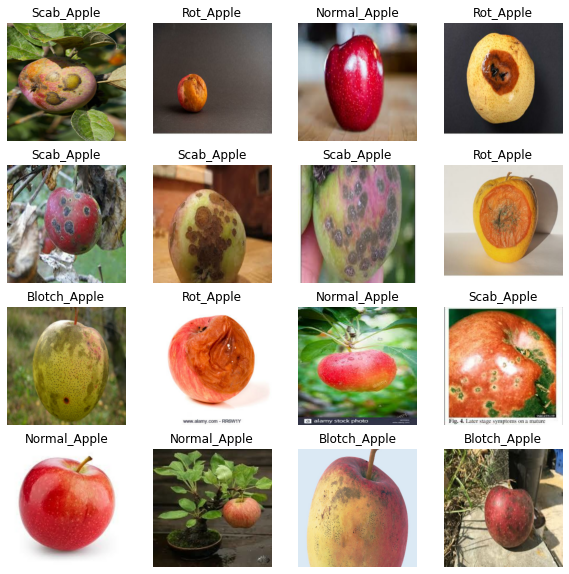

In [67]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

You can train a model using these datasets by passing them to `model.fit` (shown later in this tutorial). If you like, you can also manually iterate over the dataset and retrieve batches of images:

In [70]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 360, 360, 3)
(32,)


In [55]:
image_count = len(list(train_dir.glob('*/*.jpg')))
print(image_count)

382


In [54]:
print(list(train_ds.as_numpy_iterator()))

[(array([[[[ 65.      , 110.      ,  89.      ],
         [ 69.0375  , 114.0375  ,  93.0375  ],
         [ 77.395836, 122.395836, 101.395836],
         ...,
         [ 47.895905,  77.35422 ,  14.708435],
         [ 51.33748 ,  79.812485,  19.62497 ],
         [ 53.      ,  81.      ,  22.      ]],

        [[ 74.566666, 118.2     ,  98.566666],
         [ 75.35833 , 119.316246,  99.52062 ],
         [ 76.99722 , 121.62708 , 101.49548 ],
         ...,
         [ 47.027496,  76.48581 ,  13.840025],
         [ 50.133106,  78.60811 ,  18.420597],
         [ 51.633335,  79.63333 ,  20.633333]],

        [[ 92.69444 , 134.75    , 118.111115],
         [ 92.318405, 134.7368  , 117.97257 ],
         [ 91.53993 , 134.70949 , 117.68576 ],
         ...,
         [ 45.55272 ,  75.01103 ,  12.365249],
         [ 48.27047 ,  76.745476,  16.55796 ],
         [ 49.583332,  77.583336,  18.583334]],

        ...,

        [[ 49.      ,  52.      ,  69.94446 ],
         [ 49.      ,  52.      ,  69.94446

In [ ]:
image = tf.keras.preprocessing.image.load_img(image_path)
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

You can call `.numpy()` on either of these tensors to convert them to a `numpy.ndarray`.

### Standardize the data


The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network; in general you should seek to make your input values small.

Here, you will standardize values to be in the `[0, 1]` range by using `tf.keras.layers.Rescaling`:

In [13]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

There are two ways to use this layer. You can apply it to the dataset by calling `Dataset.map`:

In [ ]:
#  NORMALISATIE VOOR LATER - LABELS NOG FIXEN

# normalized_train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
# image_batch_train, labels_batch = next(iter(normalized_train_ds))
# first_image_train = image_batch_train[0]
# # Notice the pixel values are now in `[0,1]`.
# print(np.min(first_image_train), np.max(first_image_train))

# normalized_val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
# image_batch_val, labels_batch_val = next(iter(normalized_val_ds))
# first_image_val = image_batch_val[0]
# # Notice the pixel values are now in `[0,1]`.
# print(np.min(first_image_val), np.max(first_image_val))

# normalized_test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))
# image_batch_test, labels_batch_test = next(iter(normalized_test_ds))
# first_image_test = image_batch_test[0]
# # Notice the pixel values are now in `[0,1]`.
# print(np.min(first_image_test), np.max(first_image_test))

### Train a model

For completeness, you will show how to train a simple model using the datasets you have just prepared.

The [Sequential](https://www.tensorflow.org/guide/keras/sequential_model) model consists of three convolution blocks (`tf.keras.layers.Conv2D`) with a max pooling layer (`tf.keras.layers.MaxPooling2D`) in each of them. There's a fully-connected layer (`tf.keras.layers.Dense`) with 128 units on top of it that is activated by a ReLU activation function (`'relu'`). This model has not been tuned in any way—the goal is to show you the mechanics using the datasets you just created. To learn more about image classification, visit the [Image classification](../images/classification.ipynb) tutorial.

To train a model with this dataset you will want the data:

* To be well shuffled.
* To be batched.
* Batches to be available as soon as possible.

These features can be added using the `tf.data` API. For more details, visit the [Input Pipeline Performance](../../guide/performance/datasets.ipynb) guide.

In [ ]:
# AUTOTUNE IS EEN EXPIRIMENT VOOR LATER, ZORGT ER NU VOOR DAT MODEL NIET GOED LAADT VOOR TRAINING

# AUTOTUNE = tf.data.AUTOTUNE 

# # train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
# # val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# def configure_for_performance(ds):
#   ds = ds.cache()
#   ds = ds.shuffle(buffer_size=1000)
#   ds = ds.batch(batch_size)
#   ds = ds.prefetch(buffer_size=AUTOTUNE)
#   return ds

# train_ds = configure_for_performance(train_ds)
# val_ds = configure_for_performance(val_ds)
# test_ds = configure_for_performance(test_ds)

In [ ]:
# num_classes = 5 geen idee waarom model.summary niet werkt

# def create_model():
#   model = tf.keras.Sequential([
#     tf.keras.layers.Rescaling(1./255),
#     tf.keras.layers.Conv2D(32, 3, activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Conv2D(32, 3, activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Conv2D(32, 3, activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(num_classes)
# ])

#   model.compile(optimizer='adam',
#     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#     metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

#   return model

# Create a basic model instance
# model = create_model()

# # Display the model's architecture
# model.summary()


In [14]:
num_classes = len(class_names)

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape(img_height, img_width, 3)),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [15]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

Choose the `tf.keras.optimizers.Adam` optimizer and `tf.keras.losses.SparseCategoricalCrossentropy` loss function. To view training and validation accuracy for each training epoch, pass the `metrics` argument to `Model.compile`.

Note: You will only train for a few epochs so this tutorial runs quickly. 

In [18]:
# checkpoint_path = "training_1/cp.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)

# # Create a callback that saves the model's weights
# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
#                                                  save_weights_only=True,
#                                                  verbose=1)
#                                                  # save_freq=5*batch_size) terug aan als batch omhoog gaat

model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10)
#   callbacks=[cp_callback])  # Pass callback to training


Epoch 1/10
306/306 [==============================] - ETA: 0s - loss: 1.2686 - sparse_categorical_accuracy: 0.4706
Epoch 1: saving model to training_1/cp.ckpt
306/306 [==============================] - 27s 89ms/step - loss: 1.2686 - sparse_categorical_accuracy: 0.4706 - val_loss: 1.0808 - val_sparse_categorical_accuracy: 0.5921
Epoch 2/10
306/306 [==============================] - ETA: 0s - loss: 1.0463 - sparse_categorical_accuracy: 0.6275
Epoch 2: saving model to training_1/cp.ckpt
306/306 [==============================] - 27s 89ms/step - loss: 1.0463 - sparse_categorical_accuracy: 0.6275 - val_loss: 0.8460 - val_sparse_categorical_accuracy: 0.6842
Epoch 3/10
306/306 [==============================] - ETA: 0s - loss: 0.7184 - sparse_categorical_accuracy: 0.7320
Epoch 3: saving model to training_1/cp.ckpt
306/306 [==============================] - 28s 90ms/step - loss: 0.7184 - sparse_categorical_accuracy: 0.7320 - val_loss: 0.8909 - val_sparse_categorical_accuracy: 0.7237
Epoch 4/10

In [ ]:
# os.listdir(checkpoint_dir)

In [49]:
# print (test_ds.get_single_elem)

InvalidArgumentError: Dataset had more than one element. [Op:DatasetToSingleElement]

In [98]:
def get_label(file_path):
    return file_path.split("\\")[-2]

In [100]:
#simplest predictions

pred = model.predict(test_ds)

pred = np.argmax(pred, axis=-1)

print(pred)

# original labels

actual = np.argmax(test_ds.map(get_label))

print(actual)


# conf_matrix = tf.math.confusion_matrix(labels=class_names, predictions=pred)

# print(conf_matrix)

[2 3 2 3 2 1 2 2 1 0 2 0 3 2 0 1 3 2 2 2 2 3 0 2 0 2 3 2 0 0 3 0 0 0 0 0 1
 0 0 0 2 3 3 0 3 0 2 3 2 1 1 0 3 1 0 2 0 0 2 0 2 3 3 2 3 3 0 0 2 0 0 2 2 2
 2 0 2 0 1 0 2 3 3 2 0 1 1 2 3 2 2 2 3 3 0 0 2 0 0 1 0 1 3 3 0 1 0 3 0 0 2
 2 2 0 2 2 0 3 2 3]


TypeError: in user code:


    TypeError: tf__get_label() takes 1 positional argument but 2 were given


In [ ]:
# #predict tf?

# predict_ds = tf.data.Dataset.from_tensor_slices(images).batch(32)
# result = model.predict(predict_ds, steps = 10)
# print(result.shape)

In [25]:
# predictions met plot

#hier kies je welke index je iets mee wilt
i = 1

#dit is het plaatje van index i
img = train_ds[i]

print (img)

# img_array = tf.keras.utils.img_to_array(img)
# img_array = tf.expand_dims(img_array, 0) # Change dims to fit model

# predictions = model.predict(img_array)
# score = tf.nn.softmax(predictions[0])

# print(
#     "This image most likely belongs to {} with a {:.2f} percent confidence."
#     .format(labelNames[np.argmax(score)], 100 * np.max(score))
# )

# # # print de label naam van index i
# print(labelNames[trainLabels[i]])

# # #laat plaatje zien
# plt.imshow(img)

# print(img.shape)
# # print(img)


TypeError: 'BatchDataset' object is not subscriptable

vragen:

labels zijn 0-1-2-3 ipv blotch, normal , rot en scab

prediction is np array ipv %

opslaan en ophalen met checkpoints?

hoe grijp ik elementen aan uit een tf dataset?